# STAT37601 Homework 1

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Problem 4a

In [2]:
np.random.seed(123)
mean = (0,0)
cov = [[1,0],[0,1]]
x = np.random.multivariate_normal(mean,cov,1000)

In [3]:
mean,cov,x

((0, 0), [[1, 0], [0, 1]], array([[-1.0856306 ,  0.99734545],
        [ 0.2829785 , -1.50629471],
        [-0.57860025,  1.65143654],
        ...,
        [ 1.84745342,  0.84570124],
        [-1.11992251, -0.35929672],
        [-1.60969508,  0.01357006]]))

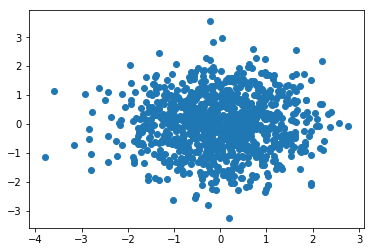

In [4]:
a = x[:,0]
b = x[:,1]
plt.scatter(a,b)
plt.show()

## Problem 4b

In [5]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(x)

In [6]:
kmeans.cluster_centers_

array([[ 0.58511754,  0.83653477],
       [ 0.38742429, -0.91712467],
       [-1.0642939 ,  0.10313537]])

In [7]:
y=kmeans.labels_

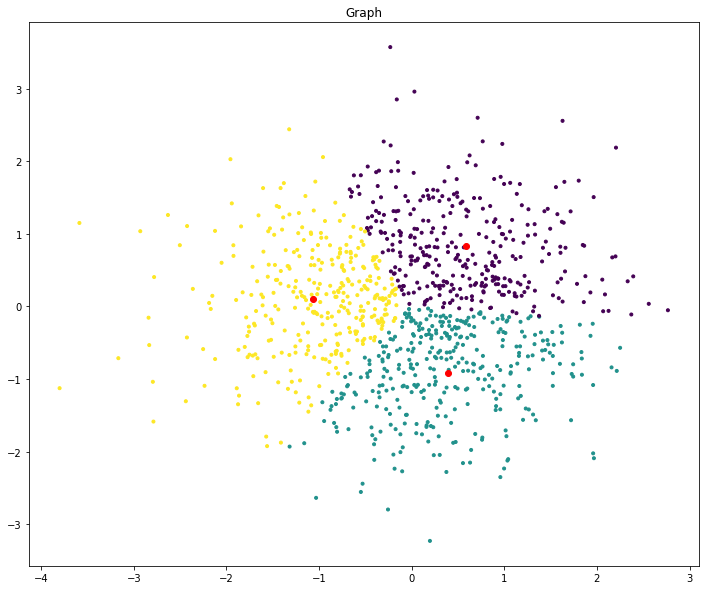

In [8]:
plt.figure(figsize=(12,10))
plt.title("Graph")
plt.scatter(x[:, 0], x[:, 1], marker='.', c=y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c='r')
plt.show()

## Problem 4c

In [9]:
N,D = x.shape
new_x = np.zeros((N,D))
for i in range(N):
    new_x[i] = 0.99*x[i] + 0.01*kmeans.cluster_centers_[y[i]]
new_kmeans = KMeans(n_clusters=3).fit(new_x)
new_y = new_kmeans.labels_

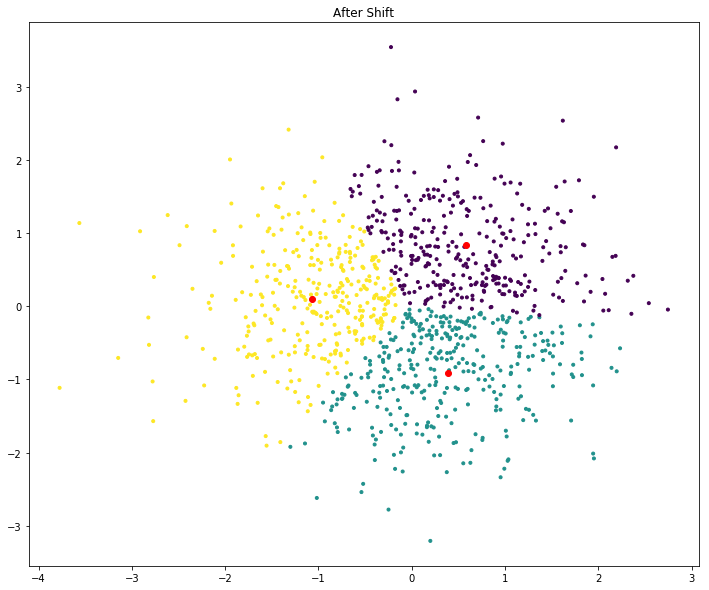

In [10]:
plt.figure(figsize=(12,10))
plt.title("After Shift")
plt.scatter(new_x[:, 0], new_x[:, 1], marker='.', c=new_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c='r')
plt.show()

## Problem 4d

In [11]:
prev = x
pred = y
for i in range(50):
    for j in range(N):
        prev[j] = 0.99*prev[j] + 0.01*kmeans.cluster_centers_[pred[j]]
    kmeans = KMeans(n_clusters=3).fit(prev)
    pred = kmeans.labels_

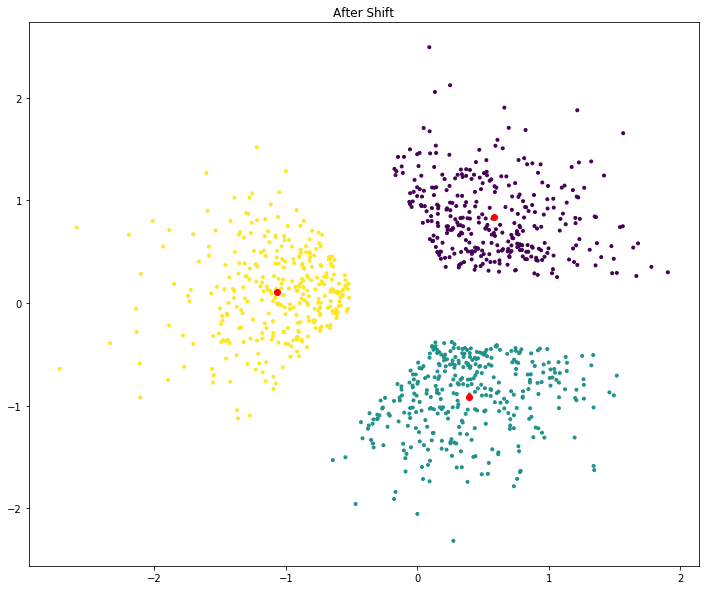

In [12]:
plt.figure(figsize=(12,10))
plt.title("After Shift")
plt.scatter(prev[:, 0], prev[:, 1], marker='.', c=pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c='r')
plt.show()

# problem 5a

In [13]:
f = open("project/cmsc25025/sou/speeches.pkl","rb")
speeches = pickle.load(f)

In [14]:
length = len(speeches)

In [43]:
sentences = list()
year = list()
for i in range(length):
    sentences.append(speeches[i].text.replace("\r\n","").replace(":",".").split("."))
    year.append(int(speeches[i].year))

In [54]:
for i in range(length):
    for j in range(len(sentences[i])):
        sentences[i][j] = sentences[i][j].strip()

In [55]:
sou_sentence_num = list()
sentence_length = list()
for i in range(length):
    sou_sentence_num.append(len(sentences[i])-1)
    sum = 0
    for j in range(len(sentences[i])-1):
        sum = sum + len(sentences[i][j].split(" "))
    sentence_length.append(sum)

In [147]:
mean_sentence_length = list()
for i in range(length):
    mean_sentence_length.append(float(sentence_length[i])/sou_sentence_num[i])
mean_sentence_length[0]
print(len(mean_sentence_length))

226


In [167]:
dictionary = dict()
dictionary_sen_len = dict()
for i in range(length):
    dictionary[year[i]] = mean_sentence_length[i] 
    dictionary_sen_len[year[i]] = sou_sentence_num[i]

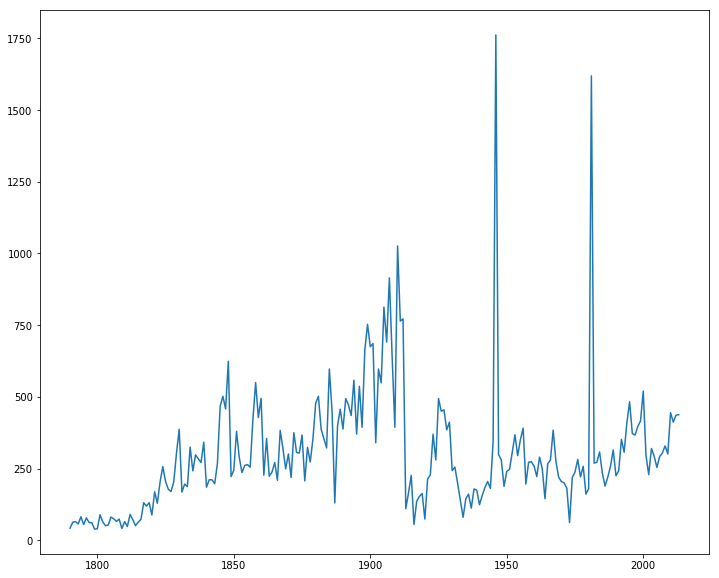

In [143]:
plt.figure(figsize=(12,10))
plt.plot(sorted(dictionary_sen_len.keys()),[dictionary_sen_len[k] for k in sorted(dictionary_sen_len.keys())])

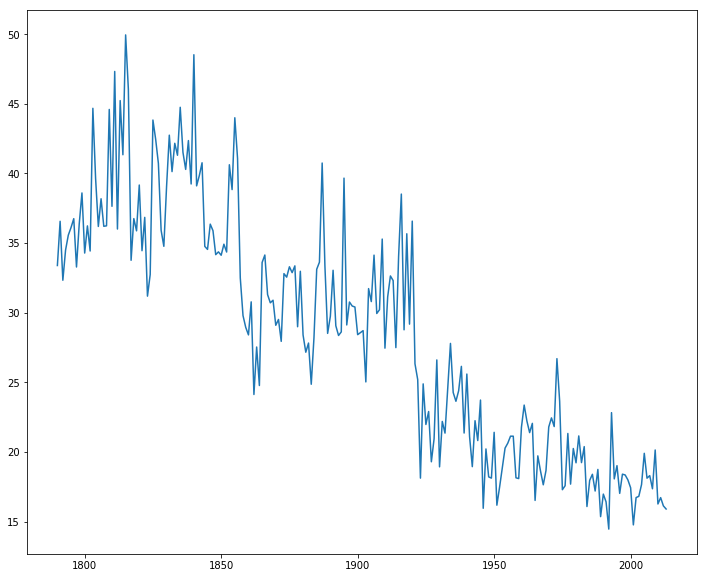

In [144]:
plt.figure(figsize=(12,10))
plt.plot(sorted(dictionary.keys()),[dictionary[k] for k in sorted(dictionary.keys())])

In [178]:
sou_len = np.array(sou_sentence_num)
mean_sen_len = np.array(sentence_length)

In [179]:
X = np.ones([len(year),2])
X[:,1:] = np.array(year).reshape(len(year),1)

In [180]:
weight_sou_len = np.linalg.pinv((X.T).dot(X)).dot(X.T).dot(sou_len.T)
weight_sou_len

array([-1.36575486e+03,  8.75755641e-01])

In [181]:
weight_mean_sen_len = np.linalg.pinv((X.T).dot(X)).dot(X.T).dot(mean_sen_len.T)
weight_mean_sen_len

array([ 1.51691623e+04, -3.71418959e+00])

Row(president='James Monroe', text=' Fellow-Citizens of the Senate and House of Representatives:\r\n\r\n \r\n\r\nThe progress of our affairs since the last session has been such as may justly be claimed and expected under a Government deriving all its powers from an enlightened people, and under laws formed by their representatives, on great consideration, for the sole purpose of promoting the welfare and happiness of their constituents. In the execution of those laws and of the powers vested by the Constitution in the Executive, unremitted attention has been paid to the great objects to which they extend.\r\n\r\nIn the concerns which are exclusively internal there is good cause to be satisfied with the result. The laws have had their due operation and effect.\r\n\r\nIn those relating to foreign powers, I am happy to state that peace and amity are preserved with all by a strict observance on both sides of the rights of each.\r\n\r\nIn matters touching our commercial intercourse, where 